In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Resources/mouse_drug_data.csv"
clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset (use Mouse Id as it is the common variable btw the 2 sets)
clinical_trial_df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, on="Mouse ID")

# Display the data table for preview
clinical_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#grouping this way it will not take the mean of what you are grouping by it will just take the mean of the other "items"
#["Tumor Vol"] to only receive the mean for these items
tumor_vol_groupby = clinical_trial_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
#print(clinical_trial_groupby)

# Convert to DataFrame
drug_time_vol_df = pd.DataFrame(tumor_vol_groupby).reset_index() 

# Preview DataFrame
drug_time_vol_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_sem = clinical_trial_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
#print(clinical_trial_groupsem)

# Convert to DataFrame
drug_time_vol_sem = pd.DataFrame(tumor_vol_sem).reset_index()

# Preview DataFrame
drug_time_vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [21]:
# Minor Data Munging to Re-Format the Data Frames
dtv_pivot = drug_time_vol_df.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
dtv_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [22]:
# Minor Data Munging to Re-Format the Data Frames (SEM)
dtv_sem_pivot = drug_time_vol_sem.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that Reformatting worked
dtv_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


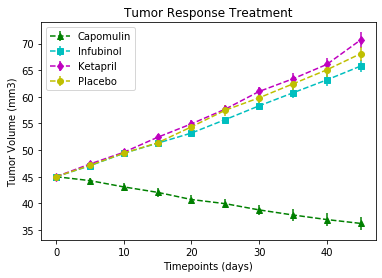

In [62]:
# Generate the Plot (with Error Bars) for 4 treatments - Capomulin, Infubinol, Ketapril, and Placebo
drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
fmts = ["g^--", "cs--", "md--", "yo--"]

fig, ax=plt.subplots()
for drug in drugs:
    x= dtv_pivot.index
    y=dtv_pivot[drug]
    err= dtv_sem_pivot[drug]
    ax.errorbar(dtv_pivot.index,dtv_pivot[drug], yerr=err, fmt=fmts[drugs.index(drug)], label=drug)
    


ax.set_title("Tumor Response Treatment")
ax.set_xlabel("Timepoints (days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend(loc='upper left')

# Save the Figure
fig.savefig("Tumor Response Treatment")


In [63]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [64]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#grouping this way it will not take the mean of what you are grouping by it will just take the mean of the other "items"
#["Tumor Vol"] to only receive the mean for these items
metastatic_groupby = clinical_trial_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
#print(clinical_trial_groupby)

# Convert to DataFrame
drug_time_site_df = pd.DataFrame(metastatic_groupby).reset_index() 

# Preview DataFrame
drug_time_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [65]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_sem = clinical_trial_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
drug_time_site_sem = pd.DataFrame(metastatic_sem).reset_index()

# Preview DataFrame
drug_time_site_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [66]:
# Minor Data Munging to Re-Format the Data Frames
dts_pivot = drug_time_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
dts_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [67]:
# Minor Data Munging to Re-Format the Data Frames (SEM)
dts_sem_pivot = drug_time_site_sem.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that Reformatting worked
dts_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


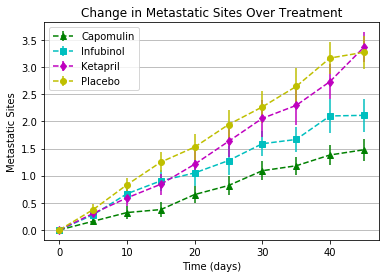

In [69]:
# Generate the Plot (with Error Bars) for 4 treatments - Capomulin, Infubinol, Ketapril, and Placebo
fig2, ax=plt.subplots()
for drug in drugs:
    x=dts_pivot.index
    y=dts_pivot[drug]
    err=dts_sem_pivot[drug]
    ax.errorbar(x, y, yerr=err, fmt=fmts[drugs.index(drug)], label=drug)

ax.set_title("Change in Metastatic Sites Over Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Metastatic Sites")
ax.legend(loc='best')
ax.yaxis.grid(True)


# Save the Figure
plt.savefig("Metastatic_Sites_Over_Treatment.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [70]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count_grouped = clinical_trial_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
#print(mice_count_grouped)

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count_grouped).reset_index()
mice_count_df = mice_count_df.rename(columns={"Mouse ID":"Mouse Count"})

# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [71]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count_df.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


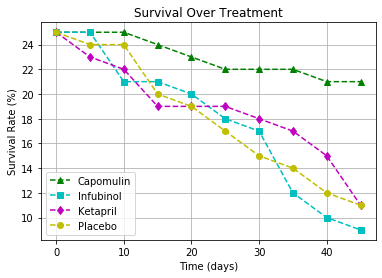

In [72]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
for drug in drugs:
    x=mice_count_pivot.index
    y=mice_count_pivot[drug]
    ax.plot(x, y, fmts[drugs.index(drug)], label=drug)
    
ax.set_title("Survival Over Treatment")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(loc='best')
ax.grid(True)

# Save the Figure
plt.savefig('Survival Over Treatment.png')

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [73]:
# Calculate the percent changes for each drug
tumor_pct_change = ((dtv_pivot.iloc[9,:] - dtv_pivot.loc[0,:]) / dtv_pivot.iloc[0,:])*100

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)